<a href="https://colab.research.google.com/github/prabhatu786/FullStackDataScience/blob/main/Instagram_Precdection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving instagram_reach.csv to instagram_reach.csv


In [ ]:


# Assuming the dataset is in CSV format
data = pd.read_csv('instagram_reach.csv')

# Display the first few rows of the dataset
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [ ]:
# Display basic statistics of the dataset
data.describe()


,Unnamed: 0,S.No,Followers,Likes
count,100.000000,100.000000,100.00000,100.00000
mean,8.940000,16.240000,961.96000,46.48000
std,6.639064,7.384286,1014.62567,55.08698
min,0.000000,1.000000,11.00000,8.00000
25%,4.000000,10.750000,252.75000,19.00000
50%,8.000000,16.500000,612.00000,29.00000
75%,12.250000,22.250000,1197.00000,46.00000
max,26.000000,30.000000,4496.00000,349.00000


In [ ]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [ ]:


# Extract numeric part from 'Time_Since_Posted'
data['Time since posted	'] = data['Time since posted'].str.extract('(\d+)').astype(float)
new_data=data.drop(['Unnamed: 0', 'S.No','Time since posted'], axis=1, inplace=False)
new_data.head()


,USERNAME,Caption,Followers,Hashtags,Likes,Time since posted\t
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11.0
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2.0
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2.0
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3.0
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3.0


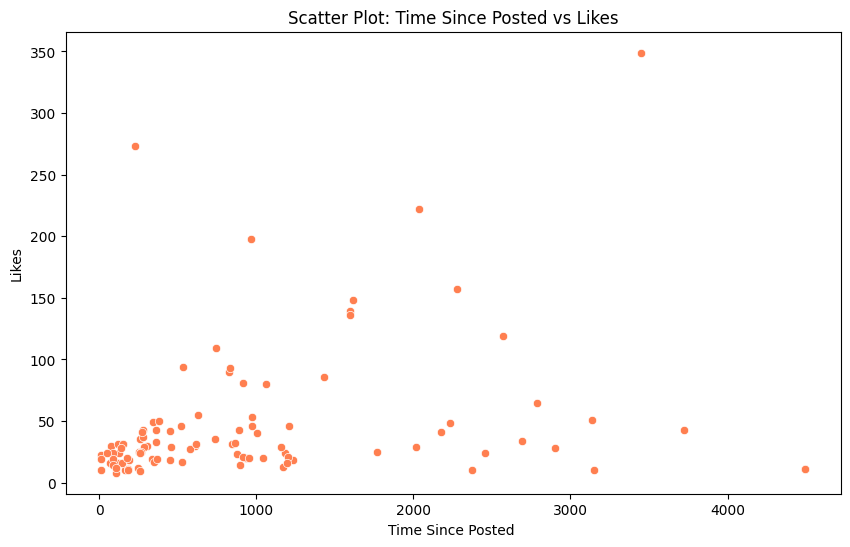

In [ ]:
# Scatter plot between 'Followers' and 'Likes'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Followers', y='Likes', data=new_data, color='coral')
plt.title('Scatter Plot: Time Since Posted vs Likes')
plt.xlabel('Time Since Posted ')
plt.ylabel('Likes')
plt.show()

In [ ]:
# Encode categorical features
categorical_features = ["USERNAME", "Hashtags"]
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_data = pd.concat([new_data.drop(categorical_features, axis=1), pd.DataFrame(encoder.fit_transform(data[categorical_features]).toarray())], axis=1)
encoded_data.head()

,Caption,Followers,Likes,Time since posted\t,0,1,2,3,4,5,...,183,184,185,186,187,188,189,190,191,192
0,Who are #DataScientist and what do they do? >>...,1600,139,11.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,We all know where it’s going. We just have to ...,880,23,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Alexander Barinov: 4 years as CFO in multinati...,255,25,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,sfad,340,49,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Ever missed a call while your phone was chargi...,304,30,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Scale numerical features
numerical_features = ["Likes", "Time since posted\t"]
scaler = StandardScaler()
scaled_data = pd.concat([encoded_data.drop(numerical_features, axis=1), pd.DataFrame(scaler.fit_transform(encoded_data[numerical_features]))], axis=1)
scaled_data.head()

,Caption,Followers,0,1,2,3,4,5,6,7,...,185,186,187,188,189,190,191,192,0,1
0,Who are #DataScientist and what do they do? >>...,1600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.687987,2.232333
1,We all know where it’s going. We just have to ...,880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.428382,-0.432255
2,Alexander Barinov: 4 years as CFO in multinati...,255,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.391893,-0.432255
3,sfad,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045976,-0.136190
4,Ever missed a call while your phone was chargi...,304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.300670,-0.136190


In [ ]:
# Separate features and target variables

X = scaled_data.drop(["Likes", "Time since posted/t"], axis=1)
y_likes = scaled_data["Likes"]
y_time_since_posted = scaled_data["Time since posted"]

KeyError: "['Likes' 'Time since posted/t'] not found in axis"